## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 10: Review
## Due 15 December, 2019 at 11:59 PM
### Kevin Egedy

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Choose **<u>one</u>** of the following problems. Solve the problem and then write up your solution in a stand alone Jupyter Notebook. Your notebook should have the following elements:

- Problem statement
- Mathematical description of the solution
- Executable code, commented, clear code

You will be graded on how well your notebook reads like a nicely formated, well written report. You must:

- Write mathematical descriptions using complete sentences, paragraphs, and LaTeX formulas. 
- Comment your code as necessary, with a description of what each function does and all major steps.
- Label plots axes, use legends, and use plot titles. 

# Differential Equations for Neural Networks

The computational neural networks we have been studying are quite far from what is happening in biology. A slightly more realistic model is to admit that each neuron $i$ in a network has a time varying firing rate $x_i$, for $i$ equal $1$ to $n$. We let $W \in \mathbb{R}^{n \times n}$ be weight matrix, and $b \in \mathbb{R}^n$. The dynamics of such a neural network are

$$
\dot x_i = g \left (
\sum_{j=1}^n w_{i,j} x_j + b_i
\right )
$$

where is the nonlinearity

$$
g(x) = \frac{1}{1+e^{-x}} - \frac{1}{2} .
$$

*a)* Show through simulation that the matrix 

$$
W = - \begin{pmatrix}
1 & 2 & 0 \\
0 & 1 & 2 \\
2 & 0 & 1
\end{pmatrix}
$$

with $b = 0$ results in oscillations. This is called a ring oscillator. Draw a graph representation of it. Now show through simulation that a ring of $n$ neurons so arranged oscillates when $n$ is odd, but not when it is even.

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network. 

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put 

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$. 

<hr>

In [1]:
import math
import numpy as np
import sympy as sp
from sympy import lambdify
sp.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import networkx as nx
import random
import scipy
import scipy.ndimage
import scipy.integrate as spi
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

*a)* Show through simulation that the matrix 

$$
W = - \begin{pmatrix}
1 & 2 & 0 \\
0 & 1 & 2 \\
2 & 0 & 1
\end{pmatrix}
$$

with $b = 0$ results in oscillations. This is called a ring oscillator. Draw a graph representation of it. Now show through simulation that a ring of $n$ neurons so arranged oscillates when $n$ is odd, but not when it is even.

http://genomics.princeton.edu/rajan/downloads/papers/Rajan2005.pdf

https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7827982 

In [2]:
# nonlinearity relationship betweenfiring rate and current 
def g(x):
    return 1/(1+np.exp(-x))-(1/2)

#  presynaptic neuron firing rate
def generate_initial_cond(N):
    return np.random.uniform(-2,2,size=N)

In [3]:
# 
def firing_rates(init,t,W,b,neurons):
    X = init
    N = int(neurons)
    X_rate = [0]*N
    for i in range(N):
        # dynamics        
        s = 0
        for j in range(N):
            s += W[i,j]*X[j]+b[i]
        X_rate[i] = g(s)
    return X_rate

In [4]:
# neurons
N = 3

# weight matrix
W = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
])

# bias
b = np.zeros(N)

# time
t = np.linspace(0., 100, 6000)

In [5]:
# Format Eigenvalues
_W = sp.Matrix(W)
eigs = list(_W.eigenvals().keys())
eigs = [eig.evalf() for eig in eigs]
for i,eig in enumerate(eigs):
    eig = complex(eig)
    if round(eig.real,2)==0 and round(eig.imag,2)==0:
        eigs[i] = 0
    else:
        eigs[i] = complex(round(eig.real,2),round(eig.imag,2))
eigs

[(-3+0j), -1.73j, 1.73j]

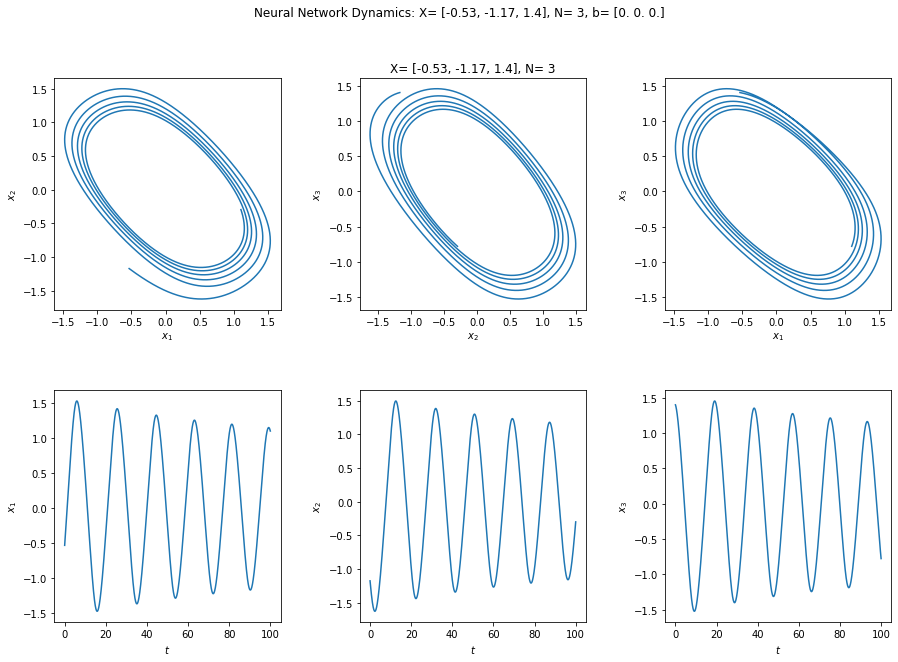

In [6]:
fig,axs = plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)

#X = [-0.65, 0.20, 0.34]  # These conditions provide nicely shaped oscillations
X = generate_initial_cond(N)
trajectory0 = spi.odeint(firing_rates,X,t,args=(W,b,N))

X = [round(x,2) for x in X]  # Format to fit on graph
axs[0,0].plot(trajectory0[:,0],trajectory0[:,1])
axs[0,0].set_xlabel("$x_1$")
axs[0,0].set_ylabel("$x_2$")

axs[0,1].plot(trajectory0[:,1],trajectory0[:,2])
axs[0,1].set_xlabel("$x_2$")
axs[0,1].set_ylabel("$x_3$")
axs[0,1].set_title(f"X= {X}, N= {N}")

axs[0,2].plot(trajectory0[:,0],trajectory0[:,2])
axs[0,2].set_xlabel("$x_1$")
axs[0,2].set_ylabel("$x_3$")

axs[1,0].plot(t,trajectory0[:,0])
axs[1,0].set_xlabel("$t$")
axs[1,0].set_ylabel("$x_1$")

axs[1,1].plot(t,trajectory0[:,1])
axs[1,1].set_xlabel("$t$")
axs[1,1].set_ylabel("$x_2$")

axs[1,2].plot(t,trajectory0[:,2])
axs[1,2].set_xlabel("$t$")
axs[1,2].set_ylabel("$x_3$")

plt.suptitle(f"Neural Network Dynamics: X= {X}, N= {N}, b= {b}")
plt.show();

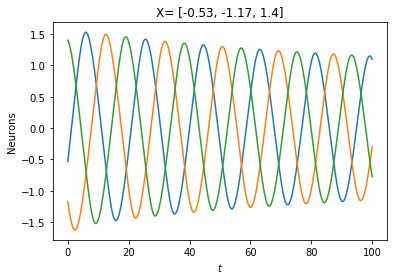

In [7]:
fig, ax = plt.subplots()
# Plot trajectory2
ax.plot(t,trajectory0[:,0],label="$x_1$")
ax.plot(t,trajectory0[:,1],label="$x_2$")
ax.plot(t,trajectory0[:,2],label="$x_3$")
ax.set_xlabel("$t$")
ax.set_ylabel("Neurons")
ax.set_title(f"X= {X}");

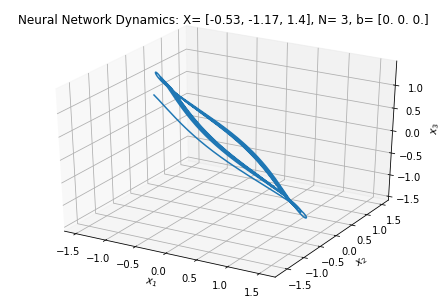

In [8]:
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.plot(trajectory0[:,0],trajectory0[:,1],trajectory0[:,2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_title(f"Neural Network Dynamics: N= {N}, b= {b}, X= {X}")
plt.show();

In [9]:
# neurons
N = 2

# weight matrix
W = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
])

# bias
b = np.zeros(N)

# time
t = np.linspace(0., 100, 6000)

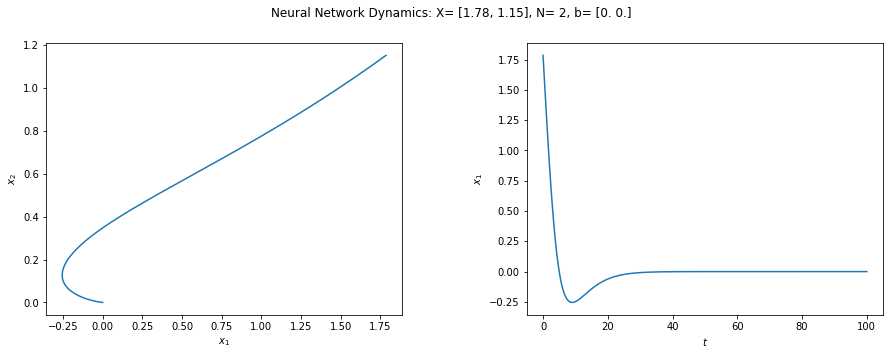

In [10]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)

X = generate_initial_cond(N)
trajectory1 = spi.odeint(firing_rates,X,t,args=(W,b,N))

X = [round(x,2) for x in X]  # Format to fit on graph
axs[0].plot(trajectory1[:,0],trajectory1[:,1])
axs[0].set_xlabel("$x_1$")
axs[0].set_ylabel("$x_2$")

axs[1].plot(t,trajectory1[:,0])
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("$x_1$")

plt.suptitle(f"Neural Network Dynamics: N= {N}, b= {b}, X= {X}")
plt.show();

<hr>

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

https://www.frontiersin.org/articles/10.3389/fncom.2019.00019/full



<hr>

**One eigenvalue zero**

$$
A = \begin{pmatrix}
a & a \\
b & b
\end{pmatrix}, 
A = \begin{pmatrix}
a & 0 \\
0 & 0
\end{pmatrix}
$$

<hr>

**Eigenvalue structures**

- Real, distinct: $
\begin{cases} \lambda_1,\lambda_2>0 \implies \text{Unstable node}\\ \lambda_1,\lambda_2<0 \implies \text{Stable node}\\ \text{one positive, one negative} \implies \text{Saddle point}\end{cases}$
<br><br>
- Real, repeated: $
\begin{cases} \text{two LI eigenvectors} \implies \text{Singular node (could be stable or not)}\\ \text{one LI eigenvector} \implies \text{Degenerate node (could be stable or not)} \end{cases}$
<br><br>
- Real, one zero eigenvalue: marginally stable
<br><br>
- Complex: $
\begin{cases} Re(\lambda)<0 \implies  \text{Stable focus (i.e. a sprial going toward the center node)} \\ Re(\lambda)>0 \implies  \text{Unstable focus (i.e. a sprial going away the center node)} \\ Re(\lambda)=0  \implies \text{Center node in which the trajectories are circles/ellipses} \end{cases}$

In [11]:
# Define A
j,k,l = sp.symbols('j,k,l')
W = -np.array([
    [1+j,2+k,0+l],
    [0+l,1+j,2+k],
    [2+k,0+l,1+j]
])

# Find Eigenvalues
_W = sp.Matrix(W)
eigs = list(_W.eigenvals().keys())
eig0 = lambdify([j,k,l], eigs[0])
eig1 = lambdify([j,k,l], eigs[1])
eigs

⎡                     k   √3⋅ⅈ⋅k   l   √3⋅ⅈ⋅l              k   √3⋅ⅈ⋅k   l   √3
⎢-j - k - l - 3, -j + ─ - ────── + ─ + ────── - √3⋅ⅈ, -j + ─ + ────── + ─ - ──
⎣                     2     2      2     2                 2     2      2     

⋅ⅈ⋅l       ⎤
──── + √3⋅ⅈ⎥
2          ⎦

In [16]:
# neurons
N = 3

# weight matrix
def generate_random_weights(N):
    j,k,l = sp.symbols('j,k,l')
    W = -sp.Matrix([
        [1+j,2+k,0+l],
        [0+l,1+j,2+k],
        [2+k,0+l,1+j]
    ])
    J,K,L=None,None,None
    while(1):
        J=random.uniform(-2,0)
        K=random.uniform(-2,0)
        L=random.uniform(-2,0)
        #eigs = list(W.subs({j:J,k:K,l:L}).eigenvals().keys())
        #eigs = [eig.evalf() for eig in eigs]
        #eigs = np.array(eigs)
        if J+K+L>-3-0.001 and J+K+L<-3+0.001:
            break
    W = np.array(W.subs({j:J,k:K,l:L})).astype(np.float64)
    return W

# bias
b = np.random.uniform(-2,2,size=N)

# time
t = np.linspace(0., 100, 10000)

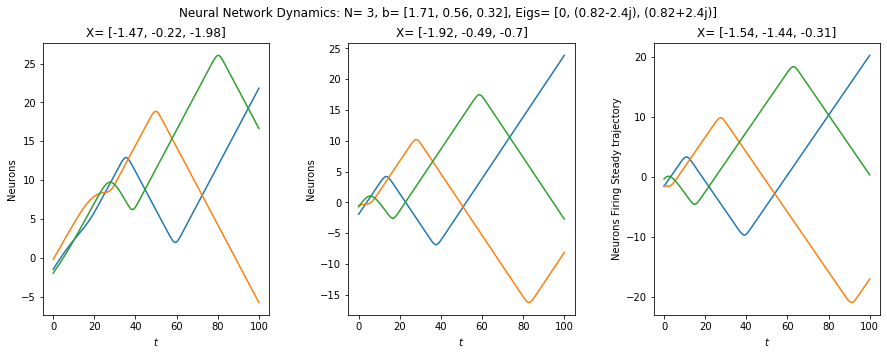

In [48]:
W = generate_random_weights(N)

# Format Eigenvalues
_W = sp.Matrix(W)
eigs = list(_W.eigenvals().keys())
eigs = [complex(eig.evalf()) for eig in eigs]
for i,eig in enumerate(eigs):
    if round(eig.real,2)==0 and round(eig.imag,2)==0:
        eigs[i] = 0
    else:
        eigs[i] = complex(round(eig.real,2),round(eig.imag,2))

# Plot
fig,axs = plt.subplots(1,3,figsize=(15,5))
plt.subplots_adjust(wspace=0.35)
b = [round(bi,2) for bi in b] # Format to fit on graph
plt.suptitle(f"Neural Network Dynamics: N= {N}, b= {b}, Eigs= {eigs}")

# Initial Conditions for trajectory2
# X = [-0.99, 1.74, -1.34]
X = np.random.uniform(-2,2,size=N)
trajectory2 = spi.odeint(firing_rates,X,t,args=(W,b,N))
X = [round(x,2) for x in X]  

# Plot trajectory2
axs[0].plot(t,trajectory2[:,0],label="$x_1$")
axs[0].plot(t,trajectory2[:,1],label="$x_2$")
axs[0].plot(t,trajectory2[:,2],label="$x_3$")
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("Neurons")
axs[0].set_title(f"X= {X}")

# Initial Conditions for trajectory3
# X = [0.34, -1.17, 1.71]
X = np.random.uniform(-2,2,size=N)
trajectory3 = spi.odeint(firing_rates,X,t,args=(W,b,N))
X = [round(x,2) for x in X]  

# Plot trajectory3
axs[1].plot(t,trajectory3[:,0],label="$x_1$")
axs[1].plot(t,trajectory3[:,1],label="$x_2$")
axs[1].plot(t,trajectory3[:,2],label="$x_3$")
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("Neurons")
axs[1].set_title(f"X= {X}")

# Initial Conditions for trajectory4
# X = [-1.26, 0.31, 1.2]
X = np.random.uniform(-2,2,size=N)
trajectory4 = spi.odeint(firing_rates,X,t,args=(W,b,N))
X = [round(x,2) for x in X]  

# Plot trajectory4
axs[2].plot(t,trajectory4[:,0],label="$x_1$")
axs[2].plot(t,trajectory4[:,1],label="$x_2$")
axs[2].plot(t,trajectory4[:,2],label="$x_3$")
axs[2].set_xlabel("$t$")
axs[2].set_ylabel("Neurons Firing Steady trajectory")
axs[2].set_title(f"X= {X}")

plt.show();

In [29]:
W,eigs

(array([[-0.47212995, -0.6947747 ,  1.1675126 ],
        [ 1.1675126 , -0.47212995, -0.6947747 ],
        [-0.6947747 ,  1.1675126 , -0.47212995]]),
 [0, (-0.71-1.61j), (-0.71+1.61j)])

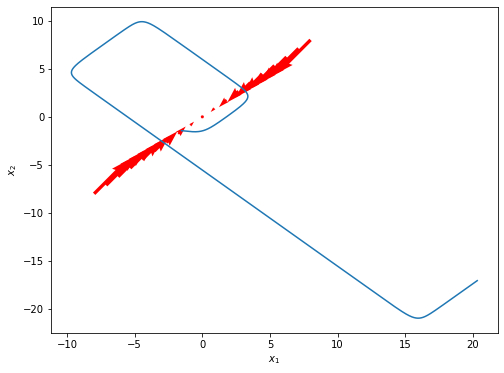

In [50]:
"""Makes a plot of the phase portraits of the given matrices"""
fig, ax = plt.subplots(figsize=(8,6))
x1,x2,x3 = np.meshgrid=(np.linspace(-8, 8, 19),np.linspace(-8, 8, 19),np.linspace(-8, 8, 19))

x1dot = W[0,0]*x1 + W[0,1]*x2 + W[0,2]*x3
x2dot = W[1,0]*x1 + W[1,1]*x2 + W[1,2]*x3 
x3dot = W[2,0]*x1 + W[2,1]*x2 + W[2,2]*x3 

#ax = Axes3D(fig)
#for i in range(50):
#    x = trajectory[10*i]
#    y = 0.1*np.array(f_vdp(x,0))
#    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.1)

ax.plot(trajectory4[:,0],trajectory4[:,1])
ax.quiver(x1, x2, x1dot, x2dot, color='r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.subplots_adjust(wspace=0.30)    
plt.show();

In [ ]:
# Draw the graph with the circuit highlighted
n = 10
p = 0.5
RG = nx.fast_gnp_random_graph(n,p)

fig,ax = plt.subplots(1,1,figsize=(10,10))
edge_colors = ["orange" if RG.has_edge(u,v) else "gray" for u,v in RG.edges]
edge_widths = [5 if RG.has_edge(u,v) else 0.5 for u,v in RG.edges]

nx.draw(RG, 
        pos=nx.kamada_kawai_layout(RG), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = edge_colors,
        width = edge_widths)